In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
iris = load_iris()

In [3]:
feature_names_full = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
feature_names = ['petal_length', 'petal_width']

In [4]:
df = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['class'] = iris.target

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


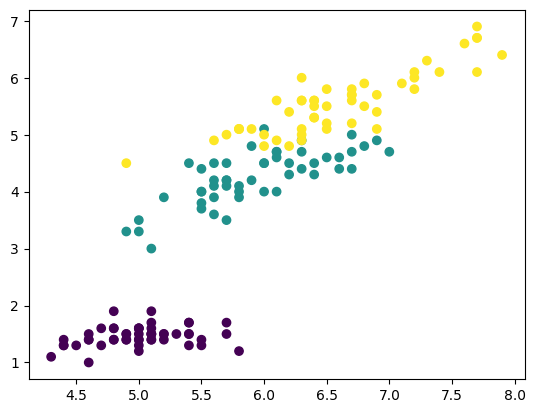

In [6]:
plt.scatter(df['sepal_length'], df['petal_length'], c = df['class'])

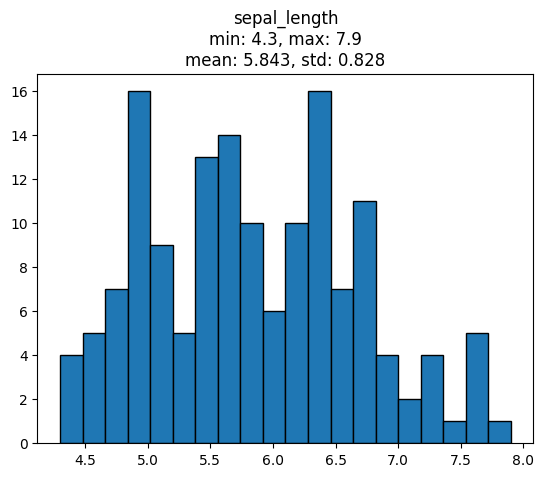

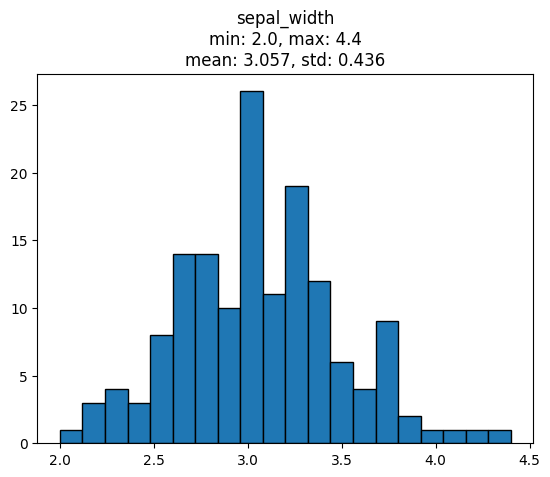

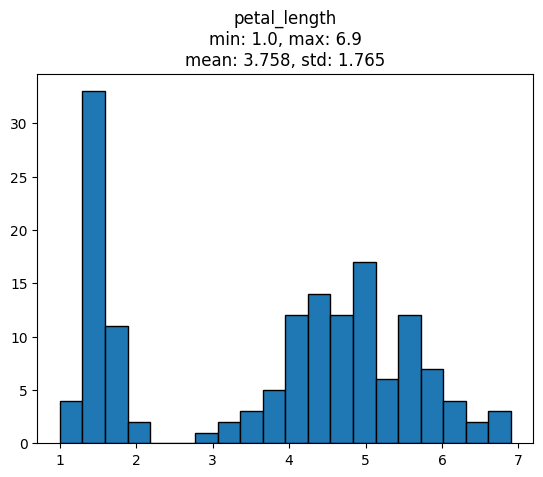

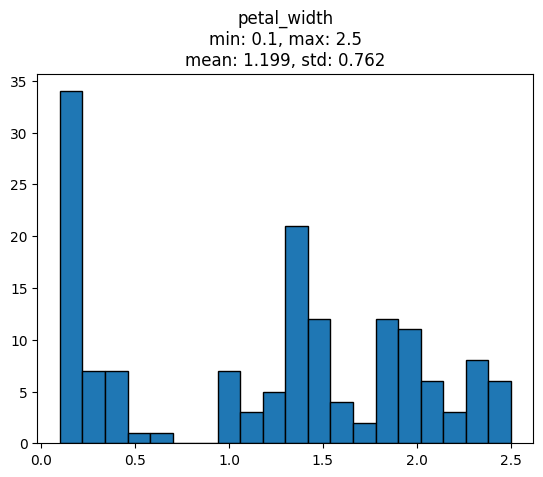

In [7]:
for name in df.columns[:4]:
    plt.hist(df[f'{name}'], bins = 20, edgecolor = 'black')
    plt.title(f'{name}\nmin: {df[f"{name}"].min()}, max: {df[f"{name}"].max()}\nmean: {df[f"{name}"].mean():.3f}, std: {df[f"{name}"].std():.3f}')
    plt.show()

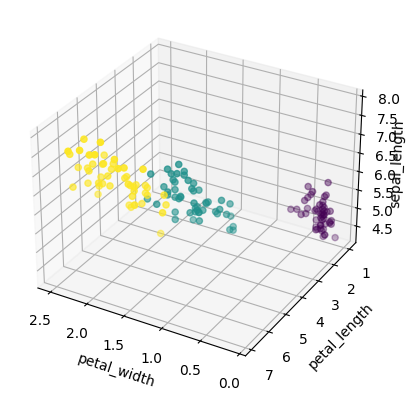

In [8]:
fig = plt.figure(0)
ax = fig.add_subplot(projection = '3d')
ax.view_init(elev = 30, azim = 120, roll = 0)

X, Y, Z = df['petal_width'], df['petal_length'], df['sepal_length']

ax.scatter(X, Y, Z, c = df['class'])
ax.set_xlabel('petal_width')
ax.set_ylabel('petal_length')
ax.set_zlabel('sepal_length')

ax.zaxis.labelpad = -4

plt.show()

In [9]:
df_max = df[feature_names].max(axis = 0)
df_min = df[feature_names].min(axis = 0)

df[feature_names] = (df[feature_names] - (df_max + df_min) / 2) # 데이터 중심 보정
df[feature_names] = df[feature_names] / df[feature_names].max(axis = 0) # 데이터 정규화

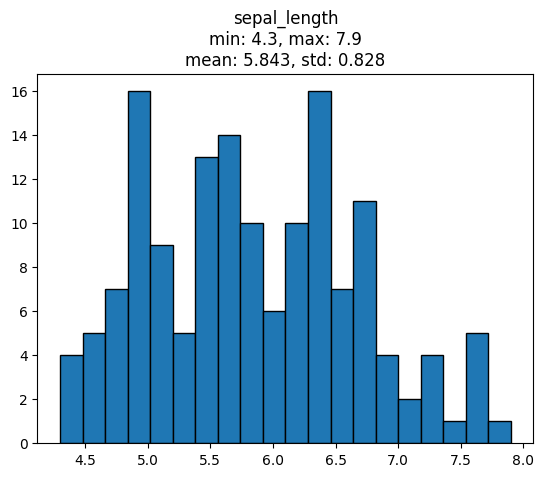

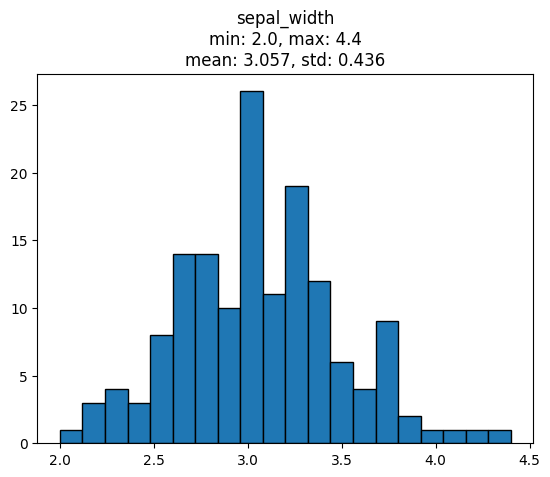

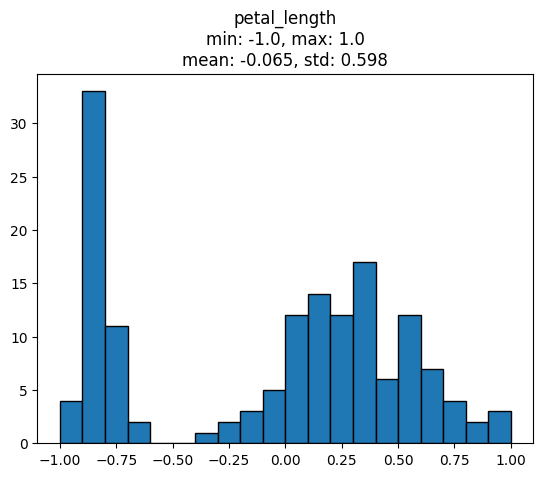

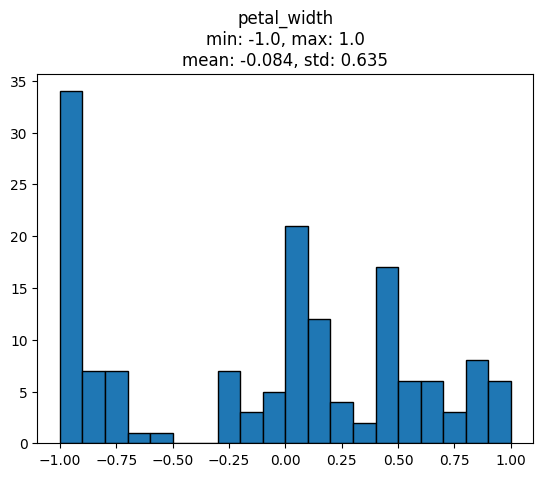

In [10]:
for name in df.columns[:4]:
    plt.hist(df[f'{name}'], bins = 20, edgecolor = 'black')
    plt.title(f'{name}\nmin: {df[f"{name}"].min()}, max: {df[f"{name}"].max()}\nmean: {df[f"{name}"].mean():.3f}, std: {df[f"{name}"].std():.3f}')
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3, shuffle = True)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(df_train[feature_names], df_train['class'])

prediction = knn_classifier.predict(df_test[feature_names])

score = (prediction == df_test['class'].values).sum() / len(df_test)
score * 100

In [13]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(df_train[feature_names], df_train['class'])

KNeighborsClassifier()

In [14]:
prediction = knn_classifier.predict(df_test[feature_names])

In [15]:
score = (prediction == df_test['class'].values).sum() / len(df_test)
score * 100

97.77777777777777

In [16]:
# db_list = list()
# for i in np.arange(-1, 1, 0.1):
#     for j in np.arange(-1.0, 1.0, 0.1):
#         for k in np.arange(-1.0, 1.0, 0.1):
#             for l in np.arange(-1.0, 1.0, 0.1):
#                 db_list.append((i, j, k, l))
# db_list = np.array(db_list)

db_list = list()
for i in np.arange(-1, 1, 0.01):
    for j in np.arange(-1.0, 1.0, 0.01):
        db_list.append((i, j))
db_list = np.array(db_list)

In [17]:
db_list.shape

(40000, 2)

In [18]:
db_pred = knn_classifier.predict(db_list)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'petal_width')

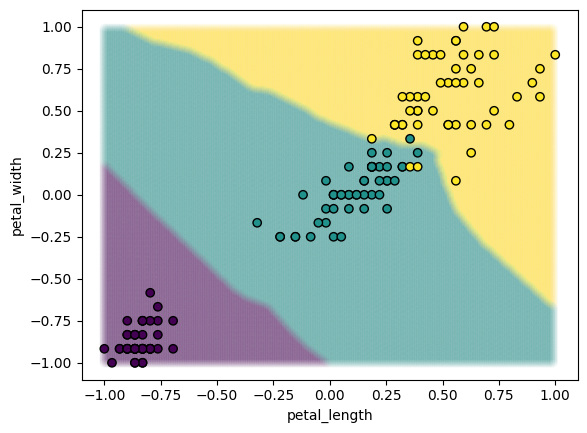

In [19]:
plt.scatter(db_list[:, 0], db_list[:, 1], c = db_pred, alpha = 0.03)
plt.scatter(df[feature_names[0]], df[feature_names[1]], c = df['class'], edgecolors = 'black')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

(array([ 5753.,     0.,     0.,     0.,     0., 21774.,     0.,     0.,
            0., 12473.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

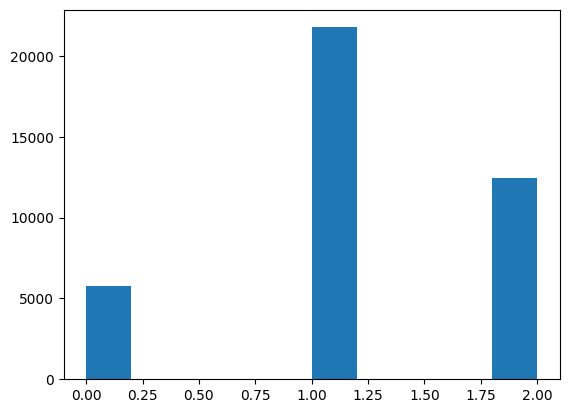

In [20]:
plt.hist(db_pred)

In [21]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(df_train[feature_names_full], df_train['class'])

prediction = decision_tree_classifier.predict(df_test[feature_names_full])

score = (prediction == df_test['class'].values).sum() / len(df_test)
score * 100

93.33333333333333

In [22]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(df_train[feature_names], df_train['class'])

db_pred = decision_tree_classifier.predict(db_list)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'petal_width')

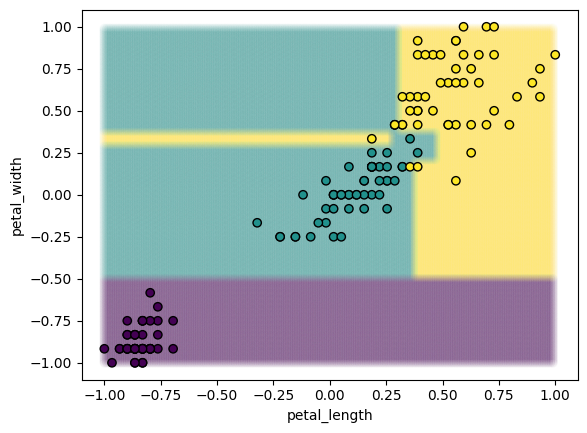

In [23]:
plt.scatter(db_list[:, 0], db_list[:, 1], c = db_pred, alpha = 0.03)
plt.scatter(df[feature_names[0]], df[feature_names[1]], c = df['class'], edgecolors = 'black')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

In [24]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(df_train[feature_names_full], df_train['class'])

score = (prediction == df_test['class'].values).sum() / len(df_test)
score * 100

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


93.33333333333333

In [25]:
logistic_regression = LogisticRegression()
logistic_regression.fit(df_train[feature_names], df_train['class'])

db_pred = logistic_regression.predict(db_list)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'petal_width')

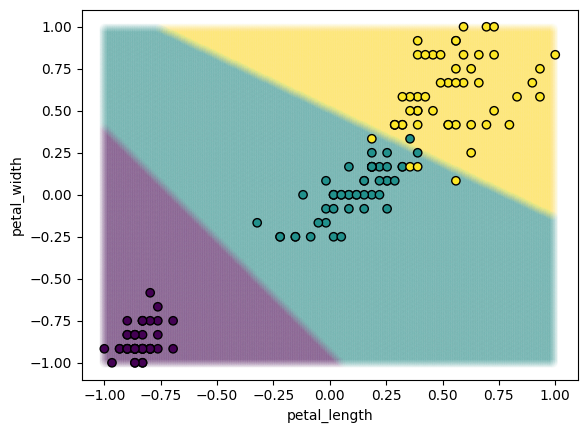

In [26]:
plt.scatter(db_list[:, 0], db_list[:, 1], c = db_pred, alpha = 0.03)
plt.scatter(df[feature_names[0]], df[feature_names[1]], c = df['class'], edgecolors = 'black')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])